# cancer TRAIN

In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn import metrics 

In [2]:

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

## preprocess the data

In [3]:



# //Data Preprocessing
# Training Image preprocessing
training_set = tf.keras.utils.image_dataset_from_directory(
 r"D:\01 STUDY MATERIAL\ai project\Breast-Splitted\train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=4,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = training_set.class_names
print(class_name)

Found 4745 files belonging to 2 classes.
['benign', 'malignant']



### Validation Image Preprocessing

In [4]:

validation_set = tf.keras.utils.image_dataset_from_directory(
  r"D:\01 STUDY MATERIAL\ai project\Breast-Splitted\val",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=4,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 1581 files belonging to 2 classes.
['benign', 'malignant']


# Building Model

In [5]:
cnn = tf.keras.models.Sequential()

## Building Convolution Layer

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [11]:
cnn.add(tf.keras.layers.Flatten())

In [12]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [14]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=2,activation='sigmoid'))

## Compiling and Training Phase

In [15]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [17]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=13)

Epoch 1/10
1187/1187 [==============================] - 19s 14ms/step - loss: 0.5890 - accuracy: 0.7737 - val_loss: 0.4244 - val_accuracy: 0.8374
Epoch 2/10
1187/1187 [==============================] - 16s 13ms/step - loss: 0.4749 - accuracy: 0.8107 - val_loss: 0.4311 - val_accuracy: 0.8406
Epoch 3/10
1187/1187 [==============================] - 16s 13ms/step - loss: 0.4488 - accuracy: 0.8291 - val_loss: 0.3981 - val_accuracy: 0.8577
Epoch 4/10
1187/1187 [==============================] - 16s 13ms/step - loss: 0.4279 - accuracy: 0.8325 - val_loss: 0.3839 - val_accuracy: 0.8463
Epoch 5/10
1187/1187 [==============================] - 16s 13ms/step - loss: 0.4051 - accuracy: 0.8512 - val_loss: 0.3847 - val_accuracy: 0.8488
Epoch 6/10
1187/1187 [==============================] - 16s 13ms/step - loss: 0.3896 - accuracy: 0.8544 - val_loss: 0.3675 - val_accuracy: 0.8608
Epoch 7/10
1187/1187 [==============================] - 16s 13ms/step - loss: 0.3772 - accuracy: 0.8609 - val_loss: 0.3482 -

# Evaluating Model

In [18]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

1187/1187 [==============================] - 5s 5ms/step - loss: 0.2743 - accuracy: 0.8862
Training accuracy: 0.8861960172653198


In [19]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

396/396 [==============================] - 2s 5ms/step - loss: 0.3479 - accuracy: 0.8665
Validation accuracy: 0.8665401935577393


In [23]:
cnn.save('trnew_cancer_modelv1.0.keras')

In [20]:
training_history.history

{'loss': [0.588990330696106,
  0.4748707413673401,
  0.4487711787223816,
  0.42791542410850525,
  0.4051075577735901,
  0.38960427045822144,
  0.37719956040382385,
  0.3473259210586548,
  0.3351346254348755,
  0.3093567490577698],
 'accuracy': [0.7736564874649048,
  0.8107481598854065,
  0.829083263874054,
  0.8324552178382874,
  0.8512117862701416,
  0.854373037815094,
  0.8609062433242798,
  0.8693361282348633,
  0.8687039017677307,
  0.8830347657203674],
 'val_loss': [0.42439335584640503,
  0.4311378598213196,
  0.39805445075035095,
  0.3839128613471985,
  0.38473501801490784,
  0.3674910068511963,
  0.3482470214366913,
  0.32525476813316345,
  0.3870319128036499,
  0.3479412794113159],
 'val_accuracy': [0.8374446630477905,
  0.840607225894928,
  0.8576850295066833,
  0.8462998270988464,
  0.8488298654556274,
  0.8608475923538208,
  0.8576850295066833,
  0.8728652596473694,
  0.8614800572395325,
  0.8665401935577393]}

In [21]:
import json
with open('training_hist_cancer.json','w') as f:
  json.dump(training_history.history,f)

In [22]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## ACCUracy visual

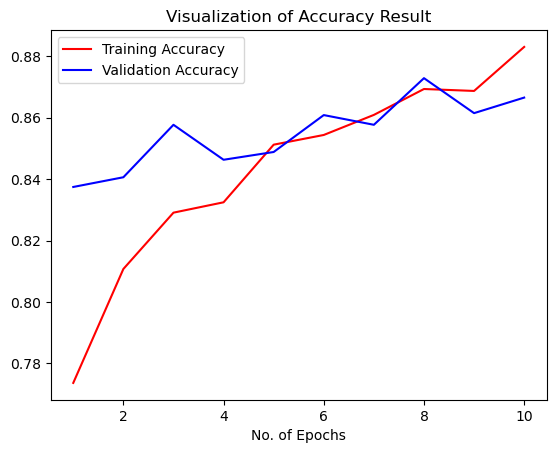

In [23]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [24]:
class_name = validation_set.class_names

In [25]:
test_set = tf.keras.utils.image_dataset_from_directory(
   r"D:\01 STUDY MATERIAL\ai project\Breast-Splitted\test",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1583 files belonging to 2 classes.


In [26]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

1583/1583 [==============================] - 4s 2ms/step


In [27]:
y_pred,y_pred.shape

(array([[0.9820978 , 0.01594068],
        [0.99098235, 0.00776221],
        [0.8380084 , 0.13705428],
        ...,
        [0.4403361 , 0.55947864],
        [0.8812576 , 0.10425551],
        [0.83094597, 0.13371417]], dtype=float32),
 (1583, 2))

In [28]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [29]:
true_categories

<tf.Tensor: shape=(1583, 2), dtype=float32, numpy=
array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)>

In [30]:
Y_true

<tf.Tensor: shape=(1583,), dtype=int64, numpy=array([0, 0, 0, ..., 1, 1, 1], dtype=int64)>

In [31]:
predicted_categories

<tf.Tensor: shape=(1583,), dtype=int64, numpy=array([0, 0, 0, ..., 1, 0, 0], dtype=int64)>

In [54]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve( Y_true,y_pred1, pos_label=1)

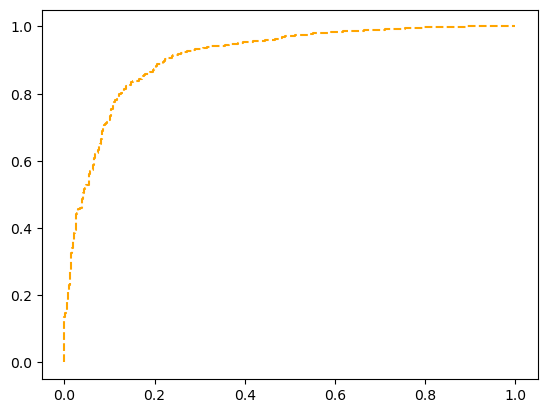

In [56]:
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')

In [39]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [38]:
from sklearn.metrics import roc_auc_score

# Example usage
roc_auc = roc_auc_score(Y_true, y_pred[:,1], average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)
roc_auc

0.9096748226845119

In [31]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

              precision    recall  f1-score   support

      benign       0.78      0.79      0.78       496
   malignant       0.90      0.90      0.90      1087

    accuracy                           0.86      1583
   macro avg       0.84      0.84      0.84      1583
weighted avg       0.86      0.86      0.86      1583



## MODEL TRANFER LEARNING

In [58]:
from tensorflow.keras.applications import VGG16, ResNet50, MobileNetV2

In [59]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

In [60]:
shape=(128,128, 3)

In [61]:
base_model_1 = VGG16(weights='imagenet', include_top=False, input_shape=shape)

base_model_3 = ResNet50(weights='imagenet', include_top=False, input_shape=shape)


base_model_6 = MobileNetV2(weights='imagenet', include_top=False, input_shape=shape)

9406464/9406464 [==============================] - 0s 0us/step


In [62]:
base_models = [base_model_1,base_model_3, base_model_6]

In [63]:
for idx, model in enumerate(base_models):
    print(f'Summary of Base Model {idx +1}:')
    model.summary()

Summary of Base Model 1:
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 

In [64]:
for model in base_models:
    for layer in model.layers:
        layer.trainable=False

## Customize & Compile the Base Models

In [65]:


custom_models = []

for idx, model in enumerate(base_models):
    x = model.output
    x = Flatten()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(2, activation='softmax')(x)
    custom_model = Model(inputs=model.input, outputs=predictions)
    custom_models.append(custom_model)
    print(f"Customized the model - {idx+1}")

Customized the model - 1
Customized the model - 2
Customized the model - 3


In [66]:
for idx, model in enumerate(custom_models):
    print(f'Summary of Custom Model {idx +1}:')
    model.summary()

Summary of Custom Model 1:
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None

In [67]:
compiled_models = []
for idx, custom_model in enumerate(custom_models):
    custom_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    compiled_models.append(custom_model)
    print(f"Compiled Custom Model {idx + 1}")

Compiled Custom Model 1
Compiled Custom Model 2
Compiled Custom Model 3


In [68]:
model_names = ["VGG16",  "ResNet50",  "MobileNetV2"]
class_labels = ['Benign', 'Malinent']

In [73]:
def train_and_evaluate_models(X_train, y_train, X_test, y_test, compiled_models, model_names, epochs=10):
    results = []
    for model, model_name in zip(compiled_models, model_names):
        # Initialize variables for tracking maximum accuracy
        max_accuracy = 0
        max_accuracy_epoch = 0

        # Define a checkpoint to save the model when target accuracy is reached
        checkpoint = ModelCheckpoint('trnew_cancer_modelv1.0.keras', monitor='val_accuracy', 
                                     save_best_only=True, save_weights_only=False, mode='max', verbose=1)

        # Define early stopping to stop training if accuracy doesn't improve for 10 epochs
        early_stopping = EarlyStopping(monitor='val_accuracy', patience=2, verbose=1)

        # Train the current model 
        history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), batch_size=32, callbacks=[checkpoint, early_stopping])
        
        
        current_epoch_predictions = []
        current_epoch_labels = []
        
        for epoch, val_accuracy in enumerate(history.history['val_accuracy'], 1):
            # Check if the current epoch achieves higher accuracy than the previous maximum
            if val_accuracy > max_accuracy:
                max_accuracy = val_accuracy
                max_accuracy_epoch = epoch
                current_epoch_predictions = model.predict(X_test)
                current_epoch_labels = y_test.argmax(axis=1)

        # Get the maximum accuracy and the corresponding epoch
        max_accuracy_epoch = np.argmax(history.history['val_accuracy'])
        max_accuracy = history.history['val_accuracy'][max_accuracy_epoch]

        # Evaluate the model on the test data
        test_loss, test_accuracy = model.evaluate(X_test, y_test)
        print(f'Test Accuracy for {model_name}: {test_accuracy}')

        # Store results
        results.append({'Model': model_name, 'Accuracy': max_accuracy})

        print("-" * 40)  # Print a line of dashes 
        print(f"Maximum accuracy of {max_accuracy:.2f} achieved at epoch {max_accuracy_epoch+1}")
        print("Model with high accuracy is saved using the keras ModelCheckpoint")
        print("-" * 40)  # Print a line of dashes 
        print("\n")

        # Assuming model.predict returns probabilities for each class
        y_pred_probs = model.predict(X_test)

        # Convert probabilities to class labels
        y_pred = np.argmax(y_pred_probs, axis=1)

        # Convert true labels to class labels if y_test is one-hot encoded
        y_true = np.argmax(y_test, axis=1)

        # Generate confusion matrix
        conf_matrix = confusion_matrix(y_true, y_pred)

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(model_name)
        plt.show()
    return results


In [74]:
results = train_and_evaluate_models(training_set, validation_set, test_set, test_set, compiled_models, model_names, epochs=10)

NameError: name 'ModelCheckpoint' is not defined